# Logistic regression exercise with Titanic data

## Step 1: Read the data into Pandas

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

## Step 2: Create X and y

Define **Pclass** and **Sex** as the features, and **Survived** as the response.

In [46]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
X = np.c_[titanic['Pclass'],le.fit_transform(titanic['Sex'])]
y = titanic.Survived

## Step 3: Split the data into training and testing sets

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Step 4: Fit a logistic regression model and examine the coefficients

Confirm that the coefficients make intuitive sense.

In [68]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg= logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

## Step 5: Make predictions on the testing set and calculate the accuracy

In [57]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

In [58]:
# calculate classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7847533632286996


## Step 6: Compare your testing accuracy to the null accuracy

In [59]:
# this works regardless of the number of classes
y_test.value_counts().head(1) / len(y_test)

0    0.573991
Name: Survived, dtype: float64

In [60]:
# this only works for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.5739910313901345

# Confusion matrix of Titanic predictions

In [61]:
# print confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[111  17]
 [ 31  64]]


In [62]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [63]:
print( 'True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 64
True Negatives: 111
False Positives: 17
False Negatives: 31


In [64]:
# calculate the sensitivity
print(TP / float(TP + FN))
print(64 / float(64 + 31))

0.6736842105263158
0.6736842105263158


In [65]:
# calculate the specificity
print(TN / float(TN + FP))
print(111 / float(111 + 17))

0.8671875
0.8671875


In [66]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0,0.5,'Frequency')

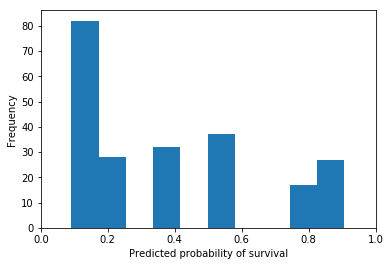

In [67]:
# histogram of predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [42]:
# increase sensitivity by lowering the threshold for predicting survival
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.3, 1, 0)

In [43]:
# old confusion matrix
print(confusion)

[[111  17]
 [ 31  64]]


In [44]:
# new confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[93 35]
 [17 78]]


In [1]:
# new sensitivity (higher than before)
print(63 / float(63 + 32))

0.6631578947368421


In [20]:
# new specificity (lower than before)
print 72 / float(72 + 56)

0.5625


In [53]:
logregPenealty = LogisticRegression(C=0.1, penalty='l1')
logregPenealty.fit(X_train, y_train)
y_pred_class = logregPenealty.predict(X_test)
# calculate classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7847533632286996
